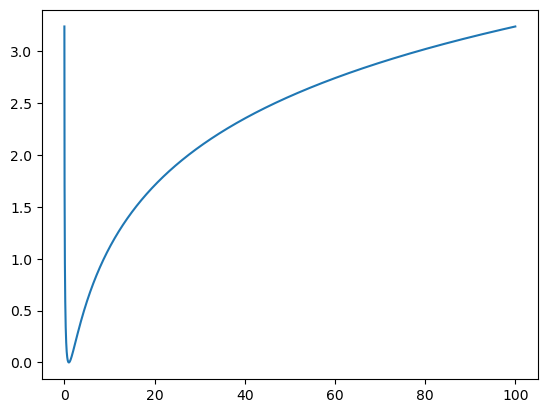

In [11]:
import itertools 
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.01,100,0.01)
y = np.log((1+x)**2/(4*x))
plt.plot(x,y)
plt.savefig("question(c).png")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='normal-distribution-frequency-66.25537109375-sample-{}.npz'
sample_list = np.arange(0,10,1)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0.01, 0.02, 0.01)
axis_std_w2 = np.arange(0.01, 0.02, 0.01)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,1,1))
test_accuracy_10_samples = np.zeros((10,1,1))


In [2]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['train_accuracy_w1_w2'].T, cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('train accuracy')
    ax.set_title('Train Accuracy Sample {}'.format(sample))
    fig.savefig("train_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            train_accuracy_10_samples[i][j][k]= data['train_accuracy_w1_w2'][j][k]

FileNotFoundError: [Errno 2] No such file or directory: 'normal-distribution-frequency-66.25537109375-sample-1000.npz'

In [ ]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['test_accuracy_w1_w2'].T, cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('test accuracy')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]


In [ ]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
average_train_accuracy_grid_10_by_10_10_samples

In [ ]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
average_test_accuracy_grid_10_by_10_10_samples

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_train_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('train accuracy')
ax.set_title('Average Train Accuracy')
fig.savefig("average_train_accuracy_grid_over_10_samples.png".format(sample))


In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('test accuracy')
ax.set_title('Average Test Accuracy')
fig.savefig("average_test_accuracy_grid_over_10_samples.png".format(sample))

In [ ]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples*100)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.shape)

In [ ]:
best_w1_w2

In [ ]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples*100)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [ ]:
test_best_w1_w2

In [ ]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [ ]:
average_train_accuracy_grid_10_by_10_10_samples[0]

In [ ]:
average_train_accuracy_grid_10_by_10_10_samples[:,2]

In [ ]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_train_accuracy_grid_10_by_10_10_samples[2])
std_dev_w2 = np.std(average_train_accuracy_grid_10_by_10_10_samples[:,0])

In [ ]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
test_std_dev_w1 = np.std(average_test_accuracy_grid_10_by_10_10_samples[1])
test_std_dev_w2 = np.std(average_test_accuracy_grid_10_by_10_10_samples[:,3])

In [ ]:
fig2, ax2 = plt.subplots()
ax2.scatter(130, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(130, array_best_w1_best_w2[1]/0.3445, std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W1")
fig2.savefig("train_accuracy_frequency130forW1.png")

In [ ]:
fig2, ax2 = plt.subplots()
ax2.scatter(130, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(130, array_best_w1_best_w2[1]/0.3445, test_std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W2")
fig2.savefig("train_accuracy_frequency130forW2.png")

In [ ]:
fig2, ax2 = plt.subplots()
ax2.scatter(450, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(450, array_best_w1_best_w2[1]/0.3445, test_std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W2")
fig2.savefig("train_accuracy_frequency130forW2.png")

In [ ]:
data = {}
data['frequency'] = 130
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2
np.savez("train_accuracy_130_frequency_neurons_w1_w2.npz",**data)

In [ ]:
data = {}
data['frequency'] = 130
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = test_std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = test_std_dev_w2
np.savez("test_accuracy_130_frequency_neurons_w1_w2.npz",**data)